In [79]:
import json
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [80]:
json_path = "../airport_chips/"
planes_path = "../airport_crop/"

Images from 0-84 is for training. Images from 85-100 is for testing. 

In [81]:
def check_overlap(box_list, contender):
    """
    Given the coordinate of of the top left vertex of the 224x224 square,
    check if it overlaps with any of the box in box list.
    This is used to determine if the contender should be a negatve class (0).
    Inputs:
    - contender: list of 2 floats, the coordinate of the top left vertex of the square.
    contender[0] gives the x coordinate, contender[1] gives y
    - box_list: Python list of sh["points"]. sh["points"] is a (2,2) array 
    indicating a bounding box
    """
    for box in box_list:
        tl, br = box
        # check if there is no overlap at all:
        if contender[0] + 50 <= tl[0] or contender[0]-50>=br[0] or contender[1]+50<=tl[1] or contender[1]-50>=br[1]:
            return False
        else:
            return True 
            
    
def add_data(json_file, x, y):
    """
    Given a json file, data x, and label y:
    1. Crop small windows from image corresponding to the json file
    2. Add that window to x, and the corresponding label (0-no palnes, 1-static, 2-moving)
    
    For each image:
    1. The bounding boxes in airport_chips are of labels either 1 or 2
    2. We make 200 random crops of size 224x224 and label them 0. For more accuracy, we should check
    if these random crops contain any plane (if they overlap with the boxes in airport_chips)
    """
    # add data that has label 1 or 2 
    f = open(json_path+json_file)
    tags = json.load(f)
    f.close()
    tags["imageData"] = tags["imageData"][:80]+"..."
    img = cv2.imread(planes_path+tags["imagePath"])

    box_list = []
    for sh in tags["shapes"]:
        p = sh["points"]
        box_list.append(p)
        # the array of a bounding box:
        box_array = img[int(p[0][1]):int(p[1][1]), int(p[0][0]):int(p[1][0]),:]
        a,b,c = box_array.shape
        if a==0 or b==0: # if any box coordinates out of convention
            continue
        # add this data point to the data x
        x.append(box_array)
        # label
        if sh['label'] == 'mov_airplane':
            label = 2
        else:
            label = 1
        # add label to y
        y.append(label)
    
    # add data that has label 0
    count = 0
    while True:
        if count >= 50:
            break
        i, j =np.random.choice(range(1024-50),2)
#         i, j = np.random.choice(range(1024-50), 2)
        if not check_overlap(box_list, [i,j]):
            count += 1
            y.append(0)
            crop = img[j:j+50, i:i+50,:]
            if crop.shape != (50,50,3):
                print(crop.shape)
            x.append(crop)
            
        else:
            continue
    return x, y
    


# create data sets
# create training
x_train, y_train = [], []
for i, json_file in enumerate(os.listdir(json_path)):
    if int(json_file.split('.')[0]) >= 85:
        continue
    x_train, y_train = add_data(json_file, x_train, y_train)
assert(len(x_train) == len(y_train))
print('Number of data points:', len(x_train))

Number of data points: 5054


# Export data 

In [82]:
# export data
import pickle
with open('cnn_data/train_data.pkl', 'wb') as f:
    pickle.dump(x_train, f)
with open('cnn_data/train_label.pkl', 'wb') as f:
    pickle.dump(y_train, f)

# Visualize some data 

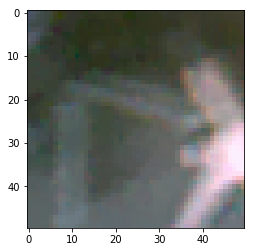

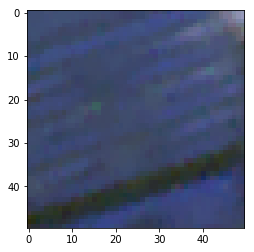

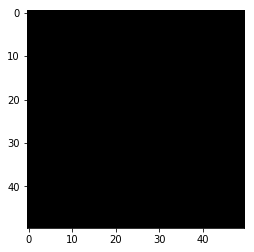

In [83]:
 
# show 3 images with label 0:
count = 0
for i in range(len(y_train)):
    if count >= 3:
        break
    if y_train[i] == 0:
        count += 1
        plt.imshow(x_train[i])
        plt.show()
    else:
        continue


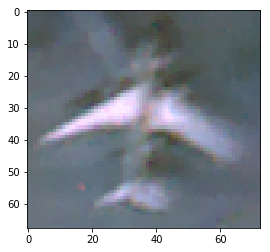

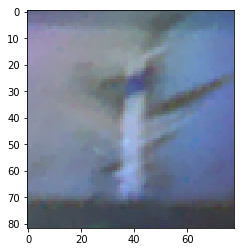

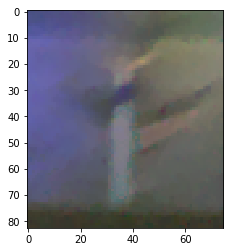

In [84]:
 
# show 3 images with label 1:
count = 0
for i in range(len(y_train)):
    if count >= 3:
        break
    if y_train[i] == 1:
        count += 1
        try:
            plt.imshow(x_train[i])
            plt.show()
        except:
            pass
    else:
        continue

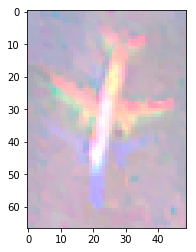

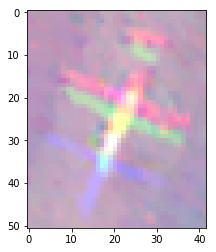

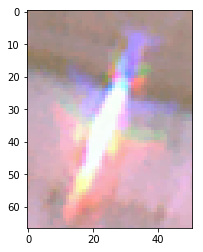

In [85]:
 
# show 3 images with label 2:
count = 0
for i in range(len(y_train)):
    if count >= 3:
        break
    if y_train[i] == 2:
        count += 1
        plt.imshow(x_train[i])
        plt.show()
    else:
        continue